In [29]:
from langgraph.graph import StateGraph , START , END
from typing import TypedDict
from IPython.display import Image
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv

In [30]:
load_dotenv()

True

In [31]:
model = ChatOpenAI(model_name="gpt-3.5-turbo")

In [32]:
class BlogState(TypedDict):
    topic: str
    outline: str
    content: str
    evaluation: str

In [33]:
graph = StateGraph(BlogState)

In [34]:
def generate_outline(state: BlogState) -> BlogState:
    topic = state['topic']
    prompt = f"Create a detailed outline for a blog post about: {topic}"
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

In [35]:
def generate_content(state: BlogState) -> BlogState:
    outline = state['outline']
    topic = state['topic']
    prompt = f"Write a comprehensive blog post based on the {topic} and following outline:\n{outline}"
    content = model.invoke(prompt).content
    state['content'] = content
    return state

In [36]:
def generate_evaluation(state: BlogState) -> BlogState:
    content = state['content']
    outline = state['outline']
    prompt = f"Evaluate the following blog on the {outline} provided. Suggest improvements if any:\n{content}"
    evaluation = model.invoke(prompt).content
    state['evaluation'] = evaluation
    return state

In [37]:
graph.add_node('generate_outline', generate_outline)

In [38]:
graph.add_node('generate_content', generate_content)

In [39]:
graph.add_node('generate_evaluation', generate_evaluation)

In [40]:
graph.add_edge(START, 'generate_outline')
graph.add_edge('generate_outline', 'generate_content')
graph.add_edge('generate_content', 'generate_evaluation')
graph.add_edge('generate_evaluation', END)

In [41]:
workflow = graph.compile()

In [42]:
intial_state = {
    'topic': 'The Future of Artificial Intelligence',
}

final_state = workflow.invoke(intial_state)
print(final_state['content'])

Artificial intelligence (AI) has become a ubiquitous and indispensable part of modern society, revolutionizing various industries and transforming the way we live and work. From personal assistants like Siri and Alexa to autonomous vehicles, healthcare, finance, and marketing, AI has proven to be a powerful tool for optimizing processes, increasing efficiency, and providing innovative solutions to complex problems. As AI continues to advance at a rapid pace, it is important to examine its current applications, potential for the future, opportunities, and threats it presents.

Artificial intelligence can be defined as the simulation of human intelligence processes by machines, especially computer systems. The concept of AI dates back to the 1950s, with early developments in logic and problem-solving techniques. Over the years, AI has evolved significantly, with the emergence of machine learning and deep learning algorithms that enable computers to learn from data and improve their perfo

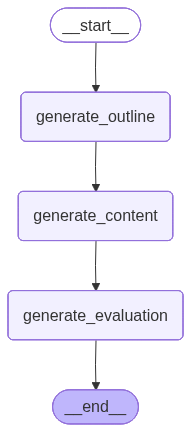

In [43]:
from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())